In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join
from examples.ArtificialMusclesCases import *
import matplotlib

matplotlib.use("TkAgg")
from matplotlib import pyplot as plt
%matplotlib inline
from os import getcwd

In [2]:
data_files_list = []
n_elem_list = [24,36,48,72,96]
for i in n_elem_list:
    data_path = '/Users/ali-7800/Desktop/Research/dev_artificial_muscle/PyElastica/examples/ArtificialMusclesCases/SingleMuscleCases/PassiveForceTest/Samuel_supercoil_stl/data/converegence/{0}'.format(i)
    data_files_list.append((([f for f in listdir(data_path) if isfile(join(data_path,f))]),i))


In [3]:
print(data_files_list[2])

(['PassiveForceTest_force_mag_3.992292983987702_Samuel_supercoil_stl__with_num_elements_48.npz', 'PassiveForceTest_force_mag_1.996146491993851_Samuel_supercoil_stl__with_num_elements_48.npz', 'PassiveForceTest_force_mag_5.988439475981553_Samuel_supercoil_stl__with_num_elements_48.npz', 'PassiveForceTest_force_mag_7.984585967975404_Samuel_supercoil_stl__with_num_elements_48.npz'], 48)


In [4]:
strain = np.zeros((len(data_files_list),len(data_files_list[0][0])))
forces = np.zeros((len(data_files_list),len(data_files_list[0][0])))
test_muscle = Samuel_supercoil_stl(experimental_data=True)


In [5]:

for datafiles_tuple,i in zip(data_files_list,range(len(data_files_list))):
    datafiles = datafiles_tuple[0]
    n_elem = datafiles_tuple[1]
    current_strain = np.zeros(len(datafiles))
    current_forces = np.zeros(len(datafiles))

    for datafile_name,j in zip(datafiles,range(len(datafiles))):
        
        current_forces[j] = float(datafile_name[27:43])
        data_path = '/Users/ali-7800/Desktop/Research/dev_artificial_muscle/PyElastica/examples/ArtificialMusclesCases/SingleMuscleCases/PassiveForceTest/Samuel_supercoil_stl/data/converegence/{0}'.format(n_elem)

        data = np.load(data_path+"/"+datafile_name)

        muscle_positions = (np.array(data['muscle_rods_position_history']))
        centerline_position = np.zeros(muscle_positions.shape[1:])
        for k in range(muscle_positions.shape[0]):
            centerline_position += muscle_positions[k, :, :, :] / 3

        # n = centerline_position.shape[-1]
        current_strain[j] = np.dot(
            np.array([0.0,0.0,1.0]),
            (
                (centerline_position[-1, :, -1] - centerline_position[-1, :, 0])
                - (centerline_position[0, :, -1] - centerline_position[0, :, 0])
            )
            / (centerline_position[0, :, -1] - centerline_position[0, :, 0]),
        )

    sort_idx = np.argsort(current_strain)
    strain[i,:] = current_strain[sort_idx]
    forces[i,:] = current_forces[sort_idx]



In [6]:
error = abs(strain-strain[-1,:])/strain[-1,:]

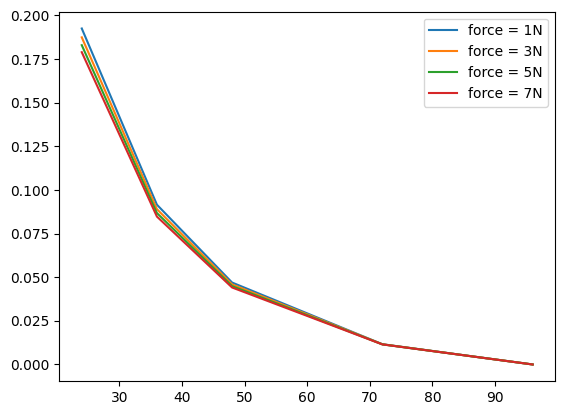

In [12]:
for current_force,i in zip(forces[-1,:],range(len(forces[-1,:]))):
    plt.plot(n_elem_list,error[:,i],label="force = {0}N".format(int(current_force)))
plt.xlabel("Number of Elements")
plt.ylabel("Absolute Error")
plt.legend()